# Advertiszing: Predict Who Will Likely Click On The Ad
## _Data Science Project - [Kaggle](https://www.kaggle.com/fayomi/advertising)_
### Author: Jean-Sebastien Provost


                          ====================================================

# Introduction

The task is to predict who will most likely click on the ad. Let's consider that we are working for a marketing company. Firstly, we have to understand what constitutes a profit and a loss. 

Let's assume that you have a marketing campaign for which we spend **1000USD per potential customer**. For each **customer that we target** with our ad campaign **and** that **clicks on the ad**, we get an **overall profit of 100USD**. However, if we target a **customer that ends up not clicking** on the ad, we incur a **net loss of 1050USD**. Therefore we can conclude that for each **customer that was not targeted** by the campaign **and** who **clicks on the ad**, we get an **overall profit of 1100USD**. Unfortunately, we have no information about the advertized product; this information could have guided us through our understanding of the user behavior.


In [1]:
    # Importing librairies
    import numpy as np
    import pandas as pd
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    import matplotlib.pyplot as plt
    import seaborn as sns
    from datetime import datetime
    import time
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import accuracy_score, confusion_matrix
    %matplotlib inline 

In [2]:
    # Loading the data
    advertising = pd.read_csv("advertising.csv")
    advertising.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


Let's look at the main characteristics of our dataset, such as the number of observations, the type of variables, the summary statistics for each variables, the number of missing data, etc.

In [3]:
    advertising.isnull().sum(axis=0)

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [4]:
print(advertising.shape)
print(advertising.dtypes)

(1000, 10)
Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Male                          int64
Country                      object
Timestamp                    object
Clicked on Ad                 int64
dtype: object


To be able to work with the feature "Timestamp", we will transoform it to datetime, a format that will allow us to perform calculations on it.

In [5]:
#advertising['Timestamp'] = pd.to_datetime(advertising['Timestamp'])
advertising['Time'] = advertising['Timestamp'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').time())
advertising['Date'] = advertising['Timestamp'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').date())

#advertising["Date"] = pd.to_datetime(advertising['Date'])

In [6]:
advertising.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


We can appreciate that our features do not seem to be skewed as the mean and the median are roughly similar. This suggests that we would not need to transform our data, at least based on their distribution. However we will investigate this assumption later by plotting our data

In [7]:
    advertising.median()

Daily Time Spent on Site       68.215
Age                            35.000
Area Income                 57012.300
Daily Internet Usage          183.130
Male                            0.000
Clicked on Ad                   0.500
dtype: float64

In [8]:
#'Ad Topic Line', 'City', 'Country
print(advertising["Country"].describe())
print("")
print(advertising["City"].describe())
print("")
print(advertising["Ad Topic Line"].describe())

count       1000
unique       237
top       France
freq           9
Name: Country, dtype: object

count          1000
unique          969
top       Lisamouth
freq              3
Name: City, dtype: object

count                                       1000
unique                                      1000
top       Persistent fault-tolerant service-desk
freq                                           1
Name: Ad Topic Line, dtype: object


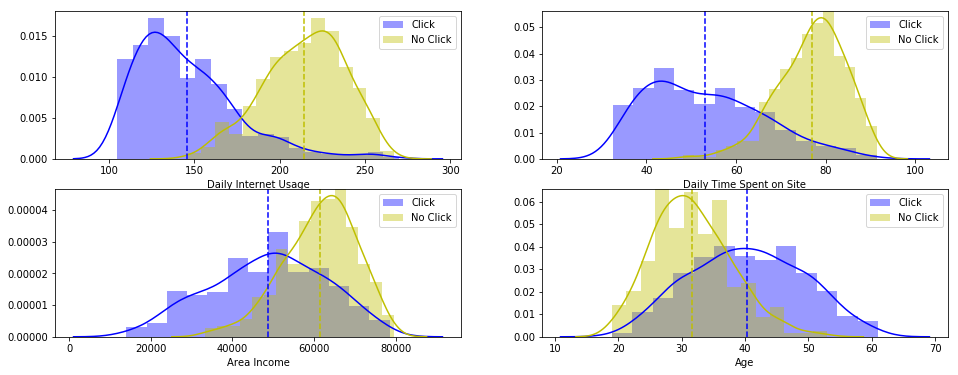

In [9]:
# Subsetting by clicks
click_yes = advertising["Clicked on Ad"] == 1
click_no = advertising["Clicked on Ad"] == 0

# Creating the plots
features = ["Daily Internet Usage", "Daily Time Spent on Site", "Area Income", "Age"]
labels = ["Click", "No Click"]

def creating_plots(features, labels):
    plt.figure(figsize=(16,6))
    for feature in features:
        plt.subplot(2, 2, features.index(feature)+1)
        sns.distplot(advertising[feature][click_yes], label=labels[0], color="b")
        sns.distplot(advertising[feature][click_no], label=labels[1], color="y")
        plt.axvline(advertising[feature][click_yes].mean(), linestyle = '--', color="b")
        plt.axvline(advertising[feature][click_no].mean(), linestyle = '--', color="y")
        plt.legend()

creating_plots(features, labels)

Regarding the categorical variables, we have almost all different cities, and we do not observe a huge amount of people within the same city, so we can guess that this feature has probably no predictive power. 
However, we have less diversity when it comes down to the different countries. Therefore we will take a look at the distribution of our sample with regards to the feature "Country".

In [10]:
table_country = pd.crosstab(index=advertising["Country"],     
                      columns="count")  
table_country.sort_values(["count"], ascending=False).head(10)

col_0,count
Country,
France,9
Czech Republic,9
Afghanistan,8
Australia,8
Turkey,8
South Africa,8
Senegal,8
Peru,8
Micronesia,8


In [11]:
table_clicked_country = pd.crosstab(advertising["Country"],
                                    advertising["Clicked on Ad"], rownames=['Country'],
                                    colnames=["Clicked On Ad"])
table_clicked_country.sort_values(1, 0, ascending=False).head(10)

Clicked On Ad,0,1
Country,,
Australia,1,7
Turkey,1,7
Ethiopia,0,7
Liberia,2,6
South Africa,2,6
Liechtenstein,0,6
Senegal,3,5
Peru,3,5
Mayotte,1,5


We can see that the users are fairly spread out acroos the globe; the the maximum users from one country reaches only 9, and that is for 237 different countries to consider. Therefore it makes it not very interesting to look at the city distribution.


the mean is:  4.22
the standard deviation is:  1.84


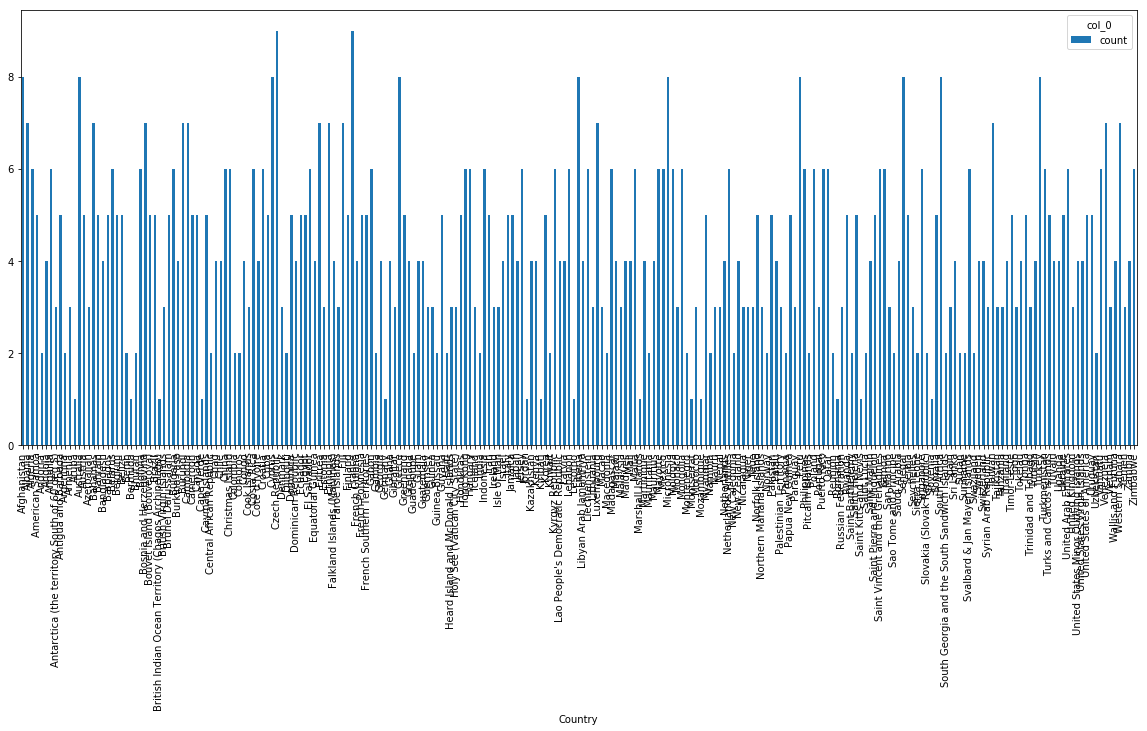

In [12]:
    table_country.plot.bar(figsize=(20,8))
    print("the mean is: ", round(np.mean(table_country["count"]),2))
    print("the standard deviation is: ", round(table_country["count"].std(),2))

The next heatmap gives us a better understanding of the relationship between the different features. We can appreciate a greater correlation between the daily time spent on the site and the daily internet usage with our target feature. Furthermore, none of our independent variables seems to correlate with each other which suggests no issue of collinearity.  

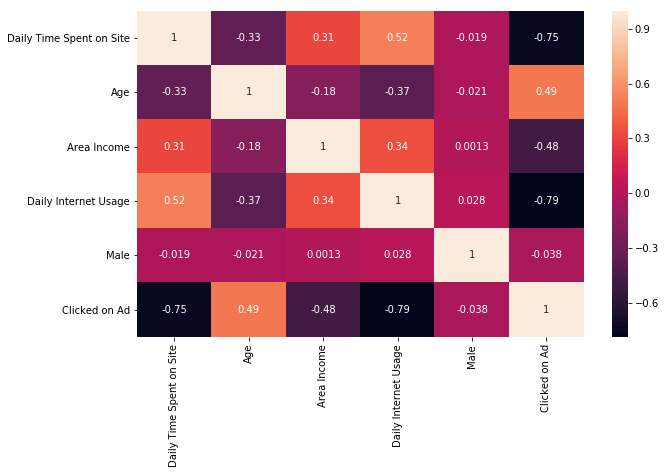

In [13]:
correlation = advertising.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation, square=False, annot=True)

Finally, the pairplot graphically represents the relationship between our target feature and the explanatory features. Furthermore, it suggests the potential direction of the relationship as well. For example, there seems to have a relationship between people who click on the ad and the fact that they spent less time on the site and have less income.

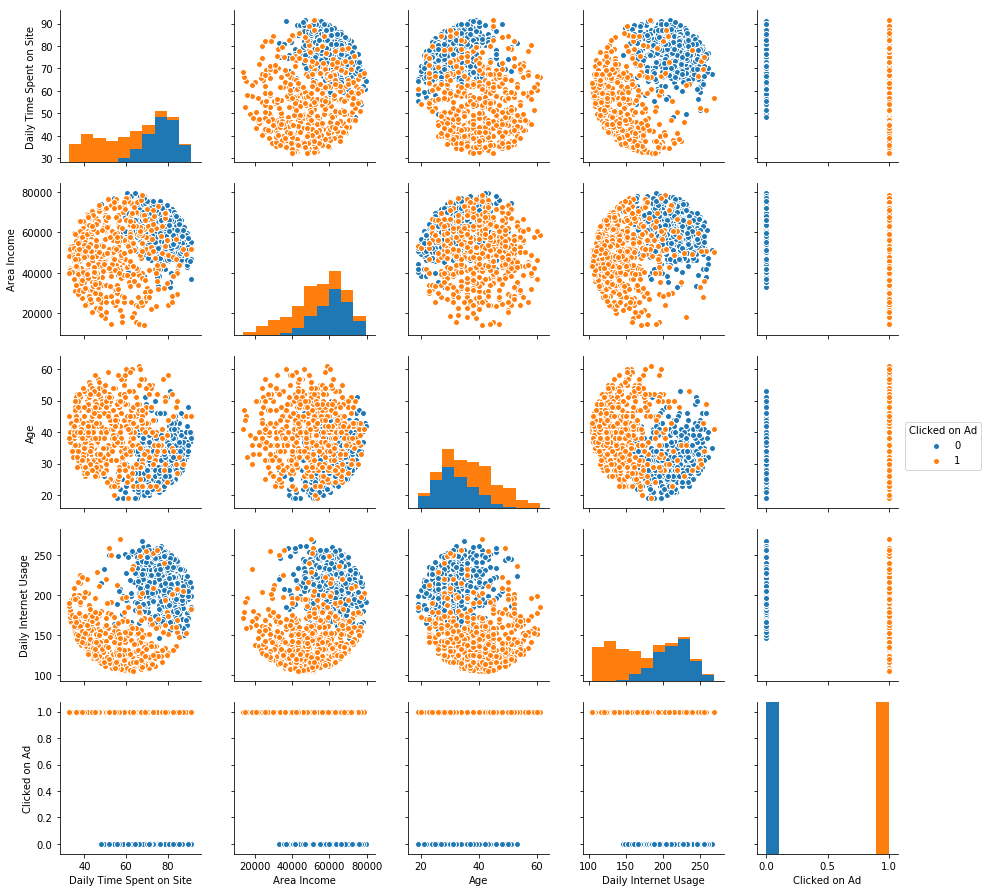

In [14]:
plt.figure()
sns.pairplot(data=advertising[["Daily Time Spent on Site",
                               "Area Income",
                               "Age",
                               "Daily Internet Usage",
                               "Clicked on Ad"]],
             hue="Clicked on Ad",
             dropna=True)


## Preparation For Machine Learning


For the purpose of the classification model, we will encode the target feature as "+1" when a customer clicks on the ad, and "-1" when a customer did not click on it. This step is not necessary, but is more pleasing to the eyes

In [15]:
advertising["Clicked"] = advertising["Clicked on Ad"].apply(lambda x : +1 if x ==1 else -1)
advertising = advertising.drop(["Clicked on Ad"],1)

For the time being, we will remove some features that would need a special approach like Natural Language Processing, and time-related analysis to keep our model simple. Furthermore, we will not be considering the "City" feature because of its lack of specificity as stated earlier.

In [16]:
advertising.dtypes
df = advertising.drop(["Ad Topic Line", "Timestamp", "Time", "Date", "City"], axis=1)
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country,Clicked
0,68.95,35,61833.90,256.09,0,Tunisia,-1
1,80.23,31,68441.85,193.77,1,Nauru,-1
2,69.47,26,59785.94,236.50,0,San Marino,-1
3,74.15,29,54806.18,245.89,1,Italy,-1
4,68.37,35,73889.99,225.58,0,Iceland,-1


In [17]:
# First, here is a one-hot encoding function to properly encode the categorical features for machine learning algorithm. 
# This function is fed with the entire dataset
df = pd.get_dummies(df)

In [18]:
X, y = df.drop(["Clicked"],1).values, df["Clicked"].values
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                  test_size=0.2,
                                                  random_state=42,
                                                  stratify=y)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                    test_size=0.15,
                                                    random_state=42,
                                                    stratify=y_train)

In [19]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
X_valid_std = stdsc.transform(X_valid)

In [20]:
# Just as a sanity check
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)

# Good, we are sane!

(680, 242)
(680,)
(120, 242)
(120,)
(200, 242)
(200,)


In [21]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X_train_std)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

/Users/jean-sebastienprovost/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     13.59
Date:                Sat, 19 May 2018   Prob (F-statistic):          6.64e-117
Time:                        08:15:03   Log-Likelihood:                -255.70
No. Observations:                 680   AIC:                             977.4
Df Residuals:                     447   BIC:                             2031.
Df Model:                         232                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.065e-16      0.017  -3.04e-14      1.0

We can see that the feature "Gender" does not to contribute to the model (i.e., see x5) so we will remove that variable and see how it affects our model.


In [22]:
X, y = df.drop(["Clicked", "Male"],1).values, df["Clicked"].values
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                  test_size=0.2,
                                                  random_state=42,
                                                  stratify=y)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                    test_size=0.15,
                                                    random_state=42,
                                                    stratify=y_train)

X2 = sm.add_constant(X_train_std)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     13.59
Date:                Sat, 19 May 2018   Prob (F-statistic):          6.64e-117
Time:                        08:15:03   Log-Likelihood:                -255.70
No. Observations:                 680   AIC:                             977.4
Df Residuals:                     447   BIC:                             2031.
Df Model:                         232                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.065e-16      0.017  -3.04e-14      1.0

We can conclude that gender was indeed not contributing to the model since the Adjusted R-squared did not change after the removal of the feature from the model.
Therefore our final model that we will use for training our logistic regression model is going to include:
- Daily Time Spent on site
- Daily Internet Usage
- Age
- Country
- Area income

In [23]:
from sklearn.linear_model import LogisticRegression

C_values = [0.001, 0.01, 0.1, 1, 10 , 100, 1000]

for i in C_values:
    lr = LogisticRegression(penalty="l2", C=i, random_state=42)
    lr.fit(X_train_std, y_train)
    training_pred = lr.predict(X_train_std)
    training_prediction = accuracy_score(y_train, training_pred)
    
    valid_pred = lr.predict(X_valid_std)
    valid_prediction = accuracy_score(y_valid, valid_pred)

    print(i, "Accuracy training set:",   round(training_prediction,4))
    print(i, "Accuracy valid set:", round(valid_prediction,4))
    print("")

0.001 Accuracy training set: 0.975
0.001 Accuracy valid set: 0.9833

0.01 Accuracy training set: 0.9838
0.01 Accuracy valid set: 0.975

0.1 Accuracy training set: 0.9912
0.1 Accuracy valid set: 0.9667

1 Accuracy training set: 0.9926
1 Accuracy valid set: 0.9583

10 Accuracy training set: 0.9941
10 Accuracy valid set: 0.9583

100 Accuracy training set: 0.9941
100 Accuracy valid set: 0.9667

1000 Accuracy training set: 0.9941
1000 Accuracy valid set: 0.9583



In [24]:
from sklearn.linear_model import LogisticRegression

C_values = [0.007, 0.009, 0.01, 0.05, 0.07, 0.09]

for i in C_values:
    lr = LogisticRegression(penalty="l2", C=i, random_state=42)
    lr.fit(X_train_std, y_train)
    training_pred = lr.predict(X_train_std)
    training_prediction = accuracy_score(y_train, training_pred)
    
    valid_pred = lr.predict(X_valid_std)
    valid_prediction = accuracy_score(y_valid, valid_pred)

    print("Accuracy training set:",   round(training_prediction,4))
    print("Accuracy valid set:", round(valid_prediction,4))
    print("")

Accuracy training set: 0.9824
Accuracy valid set: 0.975

Accuracy training set: 0.9824
Accuracy valid set: 0.975

Accuracy training set: 0.9838
Accuracy valid set: 0.975

Accuracy training set: 0.9912
Accuracy valid set: 0.9667

Accuracy training set: 0.9912
Accuracy valid set: 0.9667

Accuracy training set: 0.9912
Accuracy valid set: 0.9667



From logisitic regression, with a model including most of our features, our best result reached an accuracy of 97.5% on the validation set with C=0.01. We will use this model later on our test set. 

In [25]:
final_lr = LogisticRegression(penalty="l2", C=0.01, random_state=42)
lr_model = lr.fit(X_train_std, y_train)

valid_pred = lr.predict(X_valid_std)
confmat = confusion_matrix(y_valid, valid_pred)
print(confmat)

[[60  0]
 [ 4 56]]


Because of our business problem, we want to focus on **lowering the false positive** since they are costing the company money when we spend money on a client that does not click on the ad. It is worth noting that considering the amount of profit the company is making following the campaign and the amount of money that is being made from false negatives, it is definitely worth it NOT to make any campaign and hoping for a maximum number of false negatives.
However, let's say that we can get more insights with our clients by identifying potential features that would support the idea if a client will click on our ad or not. Therefore, we want to have an interpretable model that has a **great precision to minimize the false positive** which incur loss of money, and a model that could have a **lower specificity (e.g., recall) which increases profit anyway**. Actually if it costs 1000USD to target a customer and brings an overall profit of 100USD, then we can estimate that the overall profit from someone clicking on the ad is 1100USD. Therefore, **it is definitely worth it to have false negative**.  

In [26]:
def confusion_metrics(confusion_matrix):
    TN = confusion_matrix[0,0]
    FP = confusion_matrix[0,1]
    FN = confusion_matrix[1,0]
    TP = confusion_matrix[1,1]
 
    accuracy = (TN + TP) / (TN + TP + FP + FN)
    print("Accuracy:", round(accuracy,2))

    # Sensitivity/recall/true positive rate
    sensitivity = TP / (TP + FN)
    print("Sensitivity:", round(sensitivity,2))

    # Specificity/True Negative Rate
    specificity = TN / (TN + FP)
    print("Specificity:", round(specificity,2))

    # Precision/positive predictive value
    precision = TP / (TP + FP)
    print("Precision:", round(precision,2))

    # False positive rate
    FPR = FP / (FP + TN)
    print("False positive:", round(FPR,2))

    print("")
    print("DETAILS")
    
    # RETURN ON TP
    print("True Positive:", round((float(TP)*100),2))
    
    # Return on FP
    print("False Positive:", round((float(FP) * -1050),2))
    
    # Return on FN
    print("False Negative:", round((float(FN) * 1100),2))
    
    # Return on TN
    print("True Negative:", round((float(TN) * 0), 2))
    
    # Return on investment
    investment_return = (TP * 100) + (FP * -1050) + (FN * 1100) + (TN * 0)
    print("Profit:", round(float(investment_return),2), "$")



In [27]:
# Getting the metrics from the confusion matrix
confusion_metrics(confmat)


Accuracy: 0.97
Sensitivity: 0.93
Specificity: 1.0
Precision: 1.0
False positive: 0.0

DETAILS
True Positive: 5600.0
False Positive: -0.0
False Negative: 4400.0
True Negative: 0.0
Profit: 10000.0 $


Now, let's look at the contribution of the features to our model. We will generate the coefficients for this model and see if we can optimize our model by extracting the p-values of each feature.
The first 4 features in our model with their respective coefficients are 
- Daily Time Spent on Site : -0.4078
- Age :                       0.1671 
- Area Income :              -0.1760
- Daily Internet Usage:      -0.4516

These coefficients are more meaningful with linear regression, although they are interesting as they confirm our previous observations from our exploratory data analysis in term of the direction of the influence on the target feature.

As mentioned previously, let's look at the probability distribution of our model to see if increasing the threshold could be beneficial. It is worth noting that we have no false positive, however it would be interesting to see how far away are the distribution of "No Click" vs. "Click".

Text(0,0.5,'Frequency')

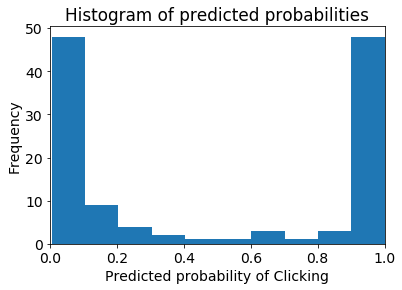

In [28]:
y_pred_prob = lr_model.predict_proba(X_valid_std)[:,1]

plt.rcParams["font.size"]= 14
plt.hist(y_pred_prob, bins=10)
plt.xlim(0, 1)
plt.title("Histogram of predicted probabilities")
plt.xlabel("Predicted probability of Clicking")
plt.ylabel("Frequency")

It looks like our model does not carry a lot of ambiguity when it comes down to predicting if someone will click on the ad or not. We could still raise our threshold to 0.6 to decrease the chance of a false positive, even though our current model seems quite categorical.

In [29]:
y_pred_class = np.where(y_pred_prob<0.6,-1,1)

In [30]:
confmat2 = confusion_matrix(y_valid, y_pred_class)
print(confmat2)

# Getting the metrics from the confusion matrix
confusion_metrics(confmat2)

[[60  0]
 [ 5 55]]
Accuracy: 0.96
Sensitivity: 0.92
Specificity: 1.0
Precision: 1.0
False positive: 0.0

DETAILS
True Positive: 5500.0
False Positive: -0.0
False Negative: 5500.0
True Negative: 0.0
Profit: 11000.0 $


By increasing the threshold from 0.5 to 0.6, we included more false negative (i.e., 1) increasing our profit by 1000USD. Furthermore, increasing the threshold could benefit the company if outliers are included in the data leading to false positive.

Let's look at our test set to see how we would perform with this model

In [31]:
final_lr = LogisticRegression(penalty="l2", C=0.01, random_state=42)
lr_model = lr.fit(X_train_std, y_train)

test_pred = lr.predict(X_test_std)
confmat3 = confusion_matrix(y_test, test_pred)
print(confmat3)

# Getting the metrics from the confusion matrix
confusion_metrics(confmat3)

[[96  4]
 [ 5 95]]
Accuracy: 0.96
Sensitivity: 0.95
Specificity: 0.96
Precision: 0.96
False positive: 0.04

DETAILS
True Positive: 9500.0
False Positive: -4200.0
False Negative: 5500.0
True Negative: 0.0
Profit: 10800.0 $


In [32]:
y_testpred_prob = lr_model.predict_proba(X_test_std)[:,1]
y_testpred_class = np.where(y_testpred_prob<0.6,-1,1)

In [33]:
confmat4 = confusion_matrix(y_test, y_testpred_class)
print(confmat4)

# Getting the metrics from the confusion matrix
confusion_metrics(confmat4)

[[97  3]
 [ 7 93]]
Accuracy: 0.95
Sensitivity: 0.93
Specificity: 0.97
Precision: 0.97
False positive: 0.03

DETAILS
True Positive: 9300.0
False Positive: -3150.0
False Negative: 7700.0
True Negative: 0.0
Profit: 13850.0 $


Considering out test set which included a sample size of 200 customers, we predict that our **overall profit would be 13850usd**. This prediction includes 
- **Profit of 9300usd from true positives**
- **Profit of 8800usd from false negatives**
- **Loss of 3150usd from false positives**

Indeed false negatives are extremely rewarding considering this particular problem. 
On the other hand, we lose 3150usd from mistakingly targeting customers that will not click on the ad. We have a loss that is the result of a misclassification, which in our case, is the equivalent of 1.5% of our overall prediction ( e.g., 3/200), and it corresponds to 3% false positive rate (e.g., 3/97). We can state that the results are excellent considering the marging of error and the predicted profit.


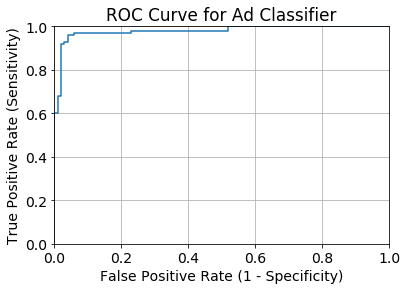

In [34]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_testpred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title("ROC Curve for Ad Classifier")
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.grid(True)

In [35]:
def evaluate_threshold(threshold):
    print("Sensitivity:", tpr[thresholds > threshold][-1])
    print("Specificity:", 1- fpr[thresholds > threshold][-1])

In [36]:
thr = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

for i in thr:
    print(i)
    evaluate_threshold(i)
    print("")

0.3
Sensitivity: 0.97
Specificity: 0.94

0.4
Sensitivity: 0.96
Specificity: 0.96

0.5
Sensitivity: 0.93
Specificity: 0.96

0.6
Sensitivity: 0.93
Specificity: 0.97

0.7
Sensitivity: 0.68
Specificity: 0.98

0.8
Sensitivity: 0.68
Specificity: 0.98



Interestingly, a **threshold of 0.7** seems to give the best result for our problem. Even though the sensitivity is reduced from 0.93 to 0.68, the **specificity increases from 0.96 to 0.98**, which represents a **reduction of the loss of 1050usd**. Furthermore, we can speculate that the decrease in sensitivity results in an increase in false negative, which brings even more profit than an accurate true positive. This seems like a conservative but sustainable approach while collecting more knowlegde on customers. This difference observed in the sensitivity corresponds roughly to 2 customers put in the false negative group, resulting in a profit of 2200usd as opposed to 200usd from a correct prediction. We cannot stress it out enough that this situation is highly unlikely in real-life.
In summary, our model predicts an **overall profit of 16900usd from this ad campaign**, which corresponds to 84.50usd per customer (e.g., 16900usd / 200 customers = 84.50usd)

In [37]:
y_testpred_prob = lr_model.predict_proba(X_test_std)[:,1]
y_testpred_class = np.where(y_testpred_prob<0.7,-1,1)
confmat5 = confusion_matrix(y_test, y_testpred_class)
print(confmat5)

# Getting the metrics from the confusion matrix
confusion_metrics(confmat5)

[[98  2]
 [ 9 91]]
Accuracy: 0.94
Sensitivity: 0.91
Specificity: 0.98
Precision: 0.98
False positive: 0.02

DETAILS
True Positive: 9100.0
False Positive: -2100.0
False Negative: 9900.0
True Negative: 0.0
Profit: 16900.0 $


## Actionable Recommendations
According to our model, we can identify potential clients by getting information about users on:

- Daily Time Spent on site
- Daily Internet Usage
- Age
- Country
- Area income

By getting this information, we can target new customers wwith our ad campaign to maximize the chance of a return on investment. We can speculate that the level of education could correlate with our finding since it was been previously reported that there is a correlation between the income and the level of education. 
So our ***targeted population*** would be customers with:

- **Lower income**
- **Spending less time on the website**
- **Spending less time on the internet**
- **Who are older than our average sample (mean around 40 years old)**

Also by increasing our threshold from our model, we can minimize the false positives (e.g., minimizing loss) which optimizes our business approach.